## Aula 08 - Redes neurais

In [2]:
import pandas as pd

cardio = pd.read_csv('heart.csv')
# referencia: https://www.kaggle.com/ronitf/heart-disease-uci

In [3]:
cardio.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
from sklearn.model_selection import train_test_split

features = cardio.columns.tolist()
features.remove('target')

X = cardio[features]

y = cardio.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(212, 13)
(212,)
(91, 13)
(91,)


### Regressão Logística no Scikit-Learn

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
y_pred = model.predict(X_test)

from sklearn.metrics import f1_score

f1_score(y_pred, y_test)

0.826923076923077

In [10]:
for C in [-2,-1,0,1,2]:

  C = 10 ** C

  model = LogisticRegression(C=C)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  print(C, '->', f1_score(y_pred, y_test))

0.01 -> 0.7272727272727272
0.1 -> 0.8076923076923077
1 -> 0.826923076923077
10 -> 0.8155339805825242
100 -> 0.8155339805825242


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### Regressão logísticas com Keras

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

In [33]:
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train.values)

In [34]:
model = keras.Sequential([
    normalizer,
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 13)                27        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 41
Trainable params: 14
Non-trainable params: 27
_________________________________________________________________


In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_split = 0.2,
    batch_size=10,
    verbose=0
    )

# verbose=0 não gera saida

In [16]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)


def plot_acc(history):
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)

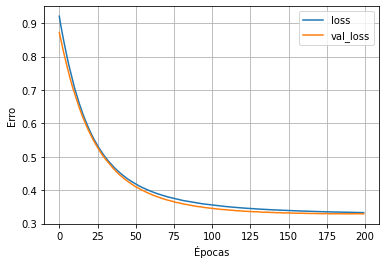

In [37]:
plot_loss(history)

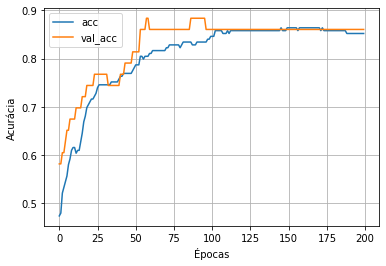

In [38]:
plot_acc(history)

In [39]:
y_pred = model.predict(X_test)

y_pred

array([[0.00387231],
       [0.6825583 ],
       [0.10594973],
       [0.00793529],
       [0.05208147],
       [0.00362223],
       [0.02506891],
       [0.6703171 ],
       [0.00437704],
       [0.99143124],
       [0.24690405],
       [0.07597962],
       [0.7956536 ],
       [0.24697286],
       [0.3023572 ],
       [0.897458  ],
       [0.9872031 ],
       [0.00782758],
       [0.54763895],
       [0.85060775],
       [0.98396677],
       [0.02710062],
       [0.71735024],
       [0.9766688 ],
       [0.9672316 ],
       [0.8279315 ],
       [0.00514802],
       [0.9740762 ],
       [0.92029226],
       [0.9801935 ],
       [0.9514845 ],
       [0.84070337],
       [0.7966329 ],
       [0.6940859 ],
       [0.08269912],
       [0.38684103],
       [0.14584225],
       [0.24346396],
       [0.61509573],
       [0.12200487],
       [0.9322475 ],
       [0.08216217],
       [0.23636013],
       [0.00826669],
       [0.73310107],
       [0.7832867 ],
       [0.33674428],
       [0.643

In [40]:
import numpy as np

f1_score(np.round(y_pred.reshape(-1)), y_test)

0.8076923076923077

In [41]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.7802


[0.4411914646625519, 0.7802197933197021]

### Rede neural classificadora

In [79]:
# opcoes: adicionar camadas,
#         mudar o tamanho das camadas,
#         mudar a ativação das camadas,
#         inibir alguns neurônios (dropout)

model = keras.Sequential([
    normalizer,
    layers.Dense(30, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(15, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split = 0.2,
    batch_size=8,
    verbose=0
    )

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 13)                27        
_________________________________________________________________
dense_31 (Dense)             (None, 30)                420       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_5 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 16        
Total params: 928
Trainable params: 901
Non-trainable params: 27
______________________________________________________

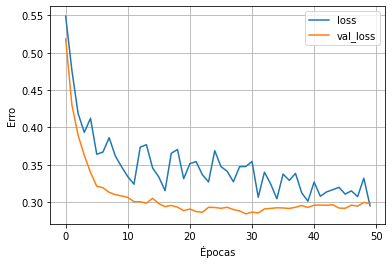

In [80]:
plot_loss(history)

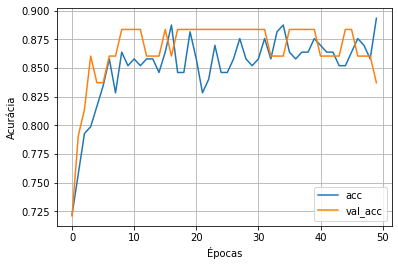

In [81]:
plot_acc(history)

In [82]:
y_pred = model.predict(X_test).reshape(-1)

from sklearn.metrics import accuracy_score

accuracy_score(np.round(y_pred), y_test)

0.7692307692307693

### Redes neurais regressoras

In [83]:
from sklearn.model_selection import train_test_split

features = cardio.columns.tolist()
features.remove('age')

X = cardio[features]

y = cardio.age

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(212, 13)
(212,)
(91, 13)
(91,)


In [84]:
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train.values)

In [106]:
model = keras.Sequential([
    normalizer,
    layers.Dense(30, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(15),
    layers.Dense(1)
])

model.summary()

model.compile(optimizer='adam',
              loss='mean_absolute_error')

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.2,
    batch_size=8,
    verbose=0
    )

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 13)                27        
_________________________________________________________________
dense_49 (Dense)             (None, 30)                420       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 16        
Total params: 928
Trainable params: 901
Non-trainable params: 27
_________________________________________________________________


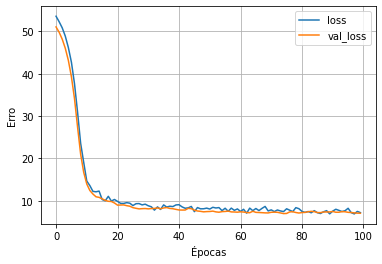

In [107]:
plot_loss(history)

In [108]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred)

[70.8296   49.872807 56.89637  57.527508 58.7251   62.981045 50.912746
 58.64867  56.59138  53.56778  45.359764 57.378727 56.223244 49.37664
 56.31809  46.218433 45.19056  67.24238  48.86164  63.946648 53.69593
 39.066216 51.265194 47.635242 55.461353 48.524    61.730328 42.826557
 55.024864 47.322002 43.345917 44.576572 52.55407  56.283443 57.423107
 51.43498  54.92092  42.448692 49.075825 68.11891  53.668896 60.75557
 54.50095  63.44743  48.96806  50.563835 55.21074  62.17262  54.238388
 63.05723  44.54832  51.82068  62.3809   48.731155 55.620197 39.20783
 60.288174 50.317905 56.543858 54.895107 74.82047  50.311687 57.50873
 41.348248 49.26763  43.776997 80.568855 54.33526  54.350918 50.75586
 62.60035  53.368935 57.461163 57.663296 54.132683 67.70042  56.714764
 55.17969  50.10248  46.37732  51.171467 47.893593 61.61396  53.125977
 69.3261   56.960854 59.84926  53.53448  47.92268  61.24797  60.332905]


In [109]:
y_test.mean()

55.043956043956044

In [110]:
y_pred.mean()

54.58974